# **ARTIFICIAL INTELLIGENCE**
## **_PROJECT-2_**
### **_RECOGNITION OF OBJECTS USING CNN_**
`NAME:` ISHIKA SHARMA

`EMAIL ID:` ishikasharma.aug2001@gmail.com


### IMPORTING THE REQUIRED

In [1]:
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt

### LOADING AND SPLITTING DATA

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print(f'Training Images: {X_train.shape}')
print(f'Testing Images: {X_test.shape}')

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
print(X_train[0].shape)

(32, 32, 3)


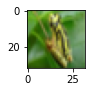

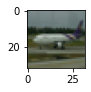

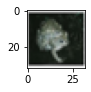

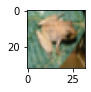

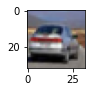

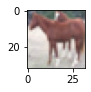

In [5]:
for i in range(232, 238):
    plt.subplot(120 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    plt.show()

### PREPROCESSING THE DATA

In [6]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data
X_train /= 255
X_test /= 255

n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)

# giving values 1 to the pictures name and all others marked as zero
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


### BUILDING THE MODEL

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()

# convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

# compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model
model.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 21s 47ms/step - loss: 1.6092 - accuracy: 0.4069 - val_loss: 1.1964 - val_accuracy: 0.5698
Epoch 2/20
391/391 [==============================] - 17s 44ms/step - loss: 1.1339 - accuracy: 0.5944 - val_loss: 0.9362 - val_accuracy: 0.6707
Epoch 3/20
391/391 [==============================] - 17s 45ms/step - loss: 0.9362 - accuracy: 0.6740 - val_loss: 0.8068 - val_accuracy: 0.7140
Epoch 4/20
391/391 [==============================] - 18s 45ms/step - loss: 0.8235 - accuracy: 0.7115 - val_loss: 0.7713 - val_accuracy: 0.7294
Epoch 5/20
391/391 [==============================] - 18s 45ms/step - loss: 0.7407 - accuracy: 0.7417 - val_loss: 0.7213 - val_accuracy: 0.7506
Epoch 6/20
391/391 [==============================] - 18s 45ms/step - loss: 0.6627 - accuracy: 0.7667 - val_loss: 0.6928 - val_accuracy: 0.7616
Epoch 7/20
391/391 [==============================] - 18s 46ms/step - loss: 0.6002 - accuracy: 0.7891 - val_loss: 0.6802 - val_accuracy:

### PREDICTING

In [8]:
classes = range(0, 10)

names =['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels =  dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109], axis=-1)

# make predictions
predictions = model.predict(batch, verbose=1)

1/1 [==============================] - 0s 181ms/step


In [9]:
print(predictions)

[[1.47900607e-07 9.02325947e-09 2.91835808e-04 1.69619278e-04
  9.03378367e-01 2.70456565e-03 2.18958371e-06 9.34533477e-02
  1.69967240e-08 2.23612115e-08]
 [2.82520887e-05 2.47578500e-05 7.22383037e-02 1.02669284e-01
  1.66080847e-01 3.41888160e-01 2.82675803e-01 3.40493210e-02
  3.15930156e-05 3.13692144e-04]
 [7.55889502e-08 5.18094794e-08 2.36269680e-05 1.22577421e-05
  3.51087266e-07 6.54463292e-05 9.99898076e-01 1.43835956e-08
  2.44207001e-08 1.10338881e-07]
 [9.41857010e-08 1.15332437e-08 7.34100977e-05 7.43267417e-01
  2.96057318e-04 8.67258292e-04 2.55494058e-01 9.57149609e-07
  6.88614819e-08 6.61397792e-07]
 [4.49113281e-11 9.99899983e-01 1.18599647e-18 2.40846974e-18
  3.96051129e-21 5.70037423e-21 8.45018068e-17 9.27846296e-20
  1.38850320e-09 9.99993281e-05]
 [5.94886558e-07 9.99905586e-01 2.80162647e-11 4.10732293e-09
  1.41611955e-15 5.56935964e-12 7.73468678e-10 1.42838181e-14
  4.67739619e-06 8.91759919e-05]
 [4.72277284e-01 1.55463454e-03 2.85736006e-02 1.79683566e

In [10]:
for image in predictions:
    print(np.sum(image))

1.0000001
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0


In [11]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 0 6 8]


### FINAL OBJECT DETECTION

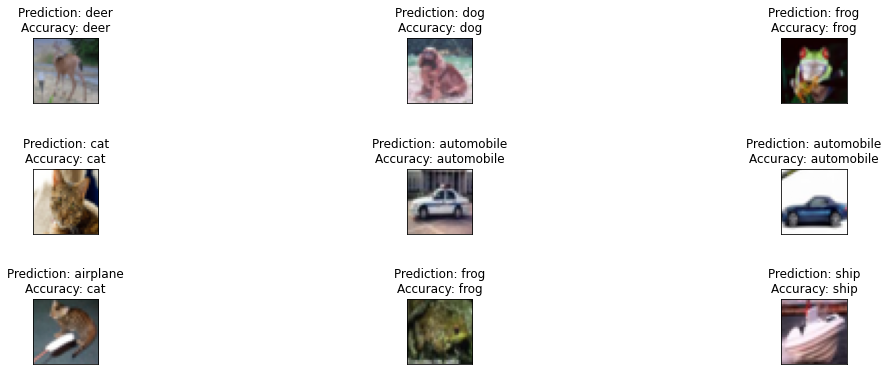

In [12]:
fig, axs = plt.subplots(3, 3, figsize=(19, 6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = f"Prediction: {class_labels[key]}\nAccuracy: {class_labels[labels[i]]}"
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)

        # plot the image
        axs[i].imshow(img)

# show the plot
plt.show()